Summary Table for Injuries:
                Variable  Coefficient
0                    AGE    -0.014509
1          CollisionTime     0.011061
2  MotorVehiclesInvolved     0.247564
3              HitandRun    -0.435495
4   IsSecondaryCollision     0.469124
5            DAY_OF_WEEK    -0.031728
6              Intercept     1.684767

Overall Accuracy: 0.8396591789310612


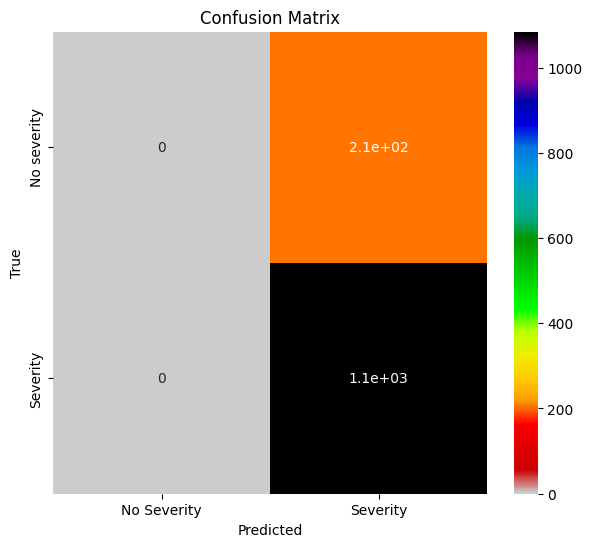

Summary Table for fatalities:
                Variable  Coefficient
0                    AGE     0.014509
1          CollisionTime    -0.011061
2  MotorVehiclesInvolved    -0.247564
3              HitandRun     0.435495
4   IsSecondaryCollision    -0.469124
5            DAY_OF_WEEK     0.031728
6              Intercept    -1.684767

Overall R^2: -0.19095940959409585


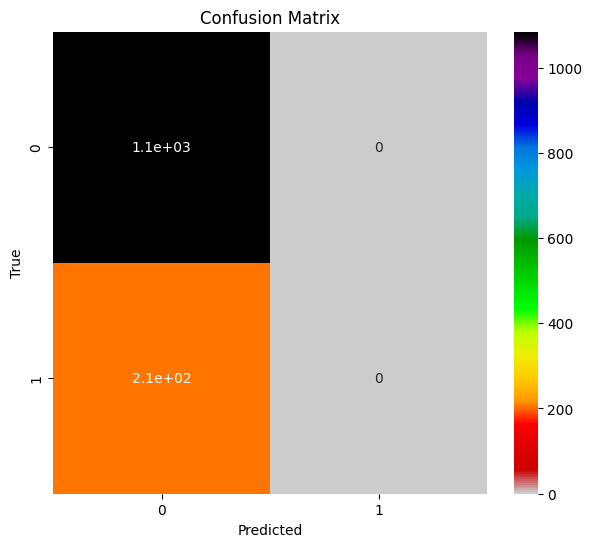

In [4]:
import pandas as pd
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#loading the file and cleaning the collision time data
accidents = pd.read_csv("Louisville_KY_Traffic_Injuries.csv", encoding ='latin-1')
accidents.dropna(subset=['AGE','CollisionTime','MotorVehiclesInvolved','HitandRun','IsSecondaryCollision','DAY_OF_WEEK'], inplace=True)

accidents['CollisionTime'] = accidents['CollisionTime'].astype(int) // 100

#changing the hit and run data to integers
accidents['HitandRun'] = accidents['HitandRun'].astype(int)
#changing the secondary collision data to integers
accidents['IsSecondaryCollision'] = accidents['IsSecondaryCollision'].astype(int)
#changing the days of the week data to integers
days = {"MONDAY":1,"TUESDAY":2,"WEDNESDAY":3,"THURSDAY":4,"FRIDAY":5,"SATURDAY":6,"SUNDAY":7}
accidents.DAY_OF_WEEK = [days[value] for value in accidents.DAY_OF_WEEK]

new_accidents = accidents[['AGE','CollisionTime','MotorVehiclesInvolved','HitandRun','IsSecondaryCollision','DAY_OF_WEEK']]

#fitting and training the data to a logitstic regression model
logistic_regression = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(new_accidents, accidents['INJURY'], random_state=11)

logistic_regression.fit(X_train,y_train)

predicted = logistic_regression.predict(X_test)
expected = y_test

#Extracting coefficients and intercept
coefficients = logistic_regression.coef_[0]
intercept = logistic_regression.intercept_[0]

#Creating a list to store summary information and adding the data to the list
summary_data = []
for i, feature in enumerate(new_accidents.columns):
    coefficient = coefficients[i]
    summary_data.append({'Variable': feature, 'Coefficient': coefficient})

summary_data.append({'Variable': 'Intercept', 'Coefficient': intercept})

#Creating DataFrame from summary data and displaying the summary table
summary_table = pd.DataFrame(summary_data)
print("Summary Table for Injuries:")
print(summary_table)

#Calculating accuracy score
overall_accuracy = metrics.accuracy_score(y_test, predicted)
print("\nOverall Accuracy:", overall_accuracy)


#Outputting the confusion matrix 
confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
confusion_df = pd.DataFrame(confusion, index=['No severity', 'Severity'], columns=['No Severity', 'Severity'])
figure = plt.figure(figsize=(7,6))
axes=sns.heatmap(confusion_df, annot = True, cmap=plt.cm.nipy_spectral_r)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#fitting and training the data to a logitstic regression model
X_train, X_test, y_train, y_test = train_test_split(new_accidents, accidents['FATALITY'], random_state=11)

logistic_regression.fit(X_train,y_train)

predicted = logistic_regression.predict(X_test)
expected = y_test

def summarize_coefficients(model, features):
    summary_data = []
    coefficients = model.coef_[0]
    intercept = model.intercept_[0]
    for i, feature in enumerate(features):
        summary_data.append({'Variable': feature, 'Coefficient': coefficients[i]})
    summary_data.append({'Variable': 'Intercept', 'Coefficient': intercept})
    return pd.DataFrame(summary_data)

#Extracting coefficients and intercept
coefficients = logistic_regression.coef_[0]
intercept = logistic_regression.intercept_[0]

#Creating a list to store summary information and adding the data to the list
summary_data = []
for i, feature in enumerate(new_accidents.columns):
    coefficient = coefficients[i]
    summary_data.append({'Variable': feature, 'Coefficient': coefficient})

summary_data.append({'Variable': 'Intercept', 'Coefficient': intercept})

#Creating DataFrame from summary data and displaying the summary table
summary_table = pd.DataFrame(summary_data)

print("Summary Table for fatalities:")
print(summary_table)

y_test = y_test.astype(int)
predicted = predicted.astype(int)

#Calculating overall R^2 (it doesn't work and I'm not sure why)
overall_r_squared = metrics.r2_score(y_test ,predicted)
print("\nOverall R^2:", overall_r_squared)

#Outputting the confusion matrix
confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
unique_labels = np.unique(y_test)
confusion_df = pd.DataFrame(confusion, index=unique_labels, columns=unique_labels)
figure = plt.figure(figsize=(7,6))
axes=sns.heatmap(confusion_df, annot = True, cmap=plt.cm.nipy_spectral_r)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

